In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import os
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('IRIS DATA.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.duplicated().sum()

3

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df. drop_duplicates(keep=False)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
import seaborn as sns

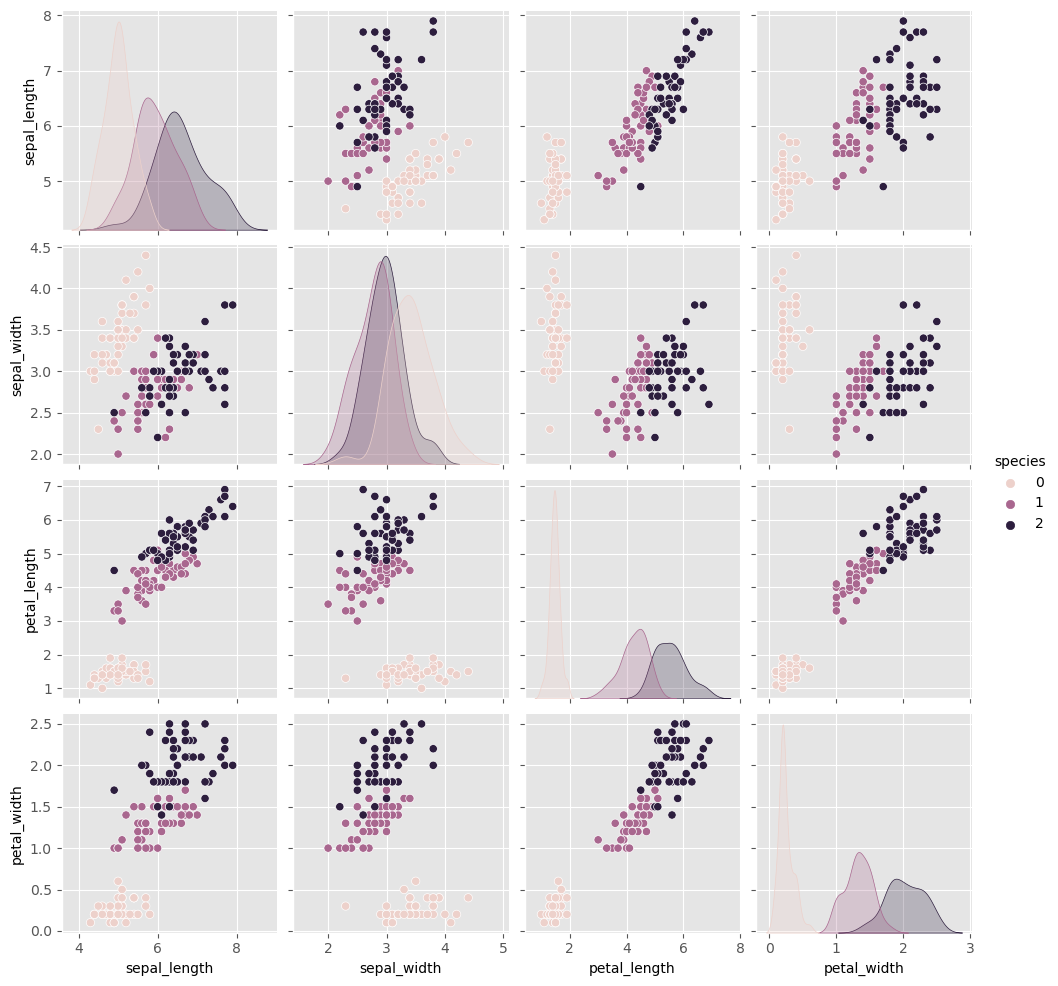

<Figure size 1000x1000 with 0 Axes>

In [35]:
sns.pairplot(df,hue="species")
fig= plt.figure()
fig.set_size_inches(10,10)

In [36]:
px.scatter_3d(df,x='sepal_length',y="sepal_width",z="species",color="sepal_width")


In [13]:
px.scatter_3d(df,x="petal_length",y="petal_width",z="species",color="petal_width")


In [14]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [16]:
df['species']=label_encoder.fit_transform(df['species'])

In [17]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
from sklearn import tree
y_pred=classifier.predict(X_test)
df2=pd.DataFrame({'ACTUAL':Y_test,'PREDICTED':y_pred})
df2.head()

,ACTUAL,PREDICTED
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

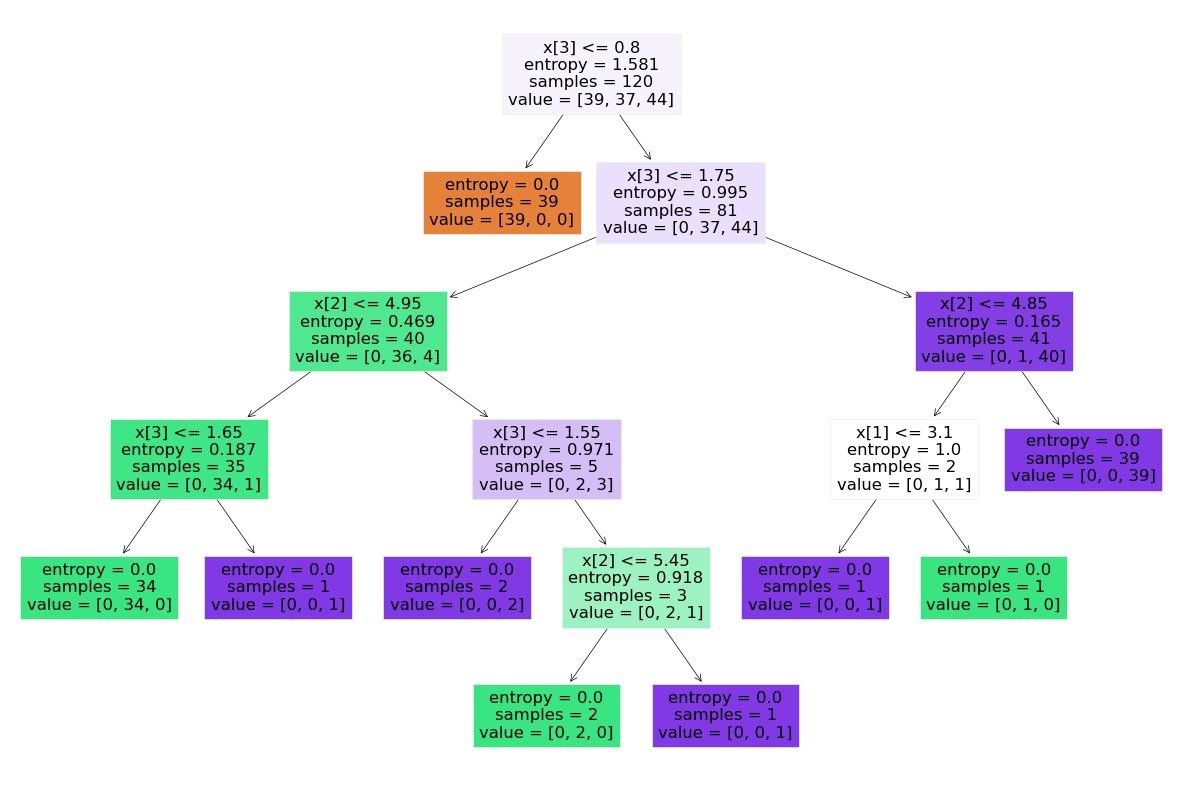

In [21]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)